In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Load the data

df = pd.read_csv("CustomerFeedback_reviews.csv", delimiter=";", encoding="latin1", on_bad_lines='warn')
print(df.columns)
df.head()


Index(['Review Number', 'App Name', 'App Store', 'App', 'Store', 'App ID',
       'Country', 'Version', 'Rating', 'Date', 'Author', 'Subject',
       'Review ID', 'Body', 'Translated Subject', 'Translated Body',
       'Sentiment', 'Device', 'Language', 'OS Version', 'Reply URL', 'Topics',
       'Custom Topics', 'Tags', 'Label1', 'Label2', 'Label3', 'Label4',
       'Product Category 1', 'Product Category 2', 'Product Category 3',
       'Product', 'Product Code', 'Error Code', 'Notes', 'HC function',
       'Unnamed: 36', 'Dish Care', 'Laundry Care', 'Cooking', 'PCP', 'Cooling',
       'Review-ID from AIM', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')


/tmp/ipykernel_746/2444124523.py:3: DtypeWarning: Columns (27,29,30,32,34,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CustomerFeedback_reviews.csv", delimiter=";", encoding="latin1", on_bad_lines='warn')


,Review Number,App Name,App Store,App,Store,App ID,Country,Version,Rating,Date,...,HC function,Unnamed: 36,Dish Care,Laundry Care,Cooking,PCP,Cooling,Review-ID from AIM,Unnamed: 43,Unnamed: 44
0,1,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,English,7.1.0,1,01.01.2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,Polish,7.1.0,2,01.01.2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,English,7.1.0,1,01.01.2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,German,NaN,1,01.01.2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Home Connect App,iOS,Home Connect App,iOS,901397789,United Arab Emirates,7.1.0,5,01.01.2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16429 entries, 0 to 16428
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Review Number       16429 non-null  int64  
 1   App Name            16429 non-null  object 
 2   App Store           16429 non-null  object 
 3   App                 16429 non-null  object 
 4   Store               16429 non-null  object 
 5   App ID              16429 non-null  object 
 6   Country             16429 non-null  object 
 7   Version             15711 non-null  object 
 8   Rating              16429 non-null  int64  
 9   Date                16429 non-null  object 
 10  Author              16383 non-null  object 
 11  Subject             4421 non-null   object 
 12  Review ID           16237 non-null  object 
 13  Body                16429 non-null  object 
 14  Translated Subject  3358 non-null   object 
 15  Translated Body     12784 non-null  object 
 16  Sent

,Review Number,App Name,App Store,App,Store,App ID,Country,Version,Rating,Date,...,HC function,Unnamed: 36,Dish Care,Laundry Care,Cooking,PCP,Cooling,Review-ID from AIM,Unnamed: 43,Unnamed: 44
count,16429.000000,16429,16429,16429,16429,16429,16429,15711,16429.000000,16429,...,272,2023,2023,2023,2023,2023,2023,3,5633.000000,1.0
unique,NaN,2,2,2,2,2,88,56,NaN,1616,...,20,1976,2,2,2,2,2,2,NaN,NaN
top,NaN,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,German,10.2.0,NaN,19.10.2024,...,Tab Counter,super,FALSCH,FALSCH,FALSCH,FALSCH,FALSCH,Notification Center,NaN,NaN
freq,NaN,12010,12010,12010,12010,12010,4610,959,NaN,276,...,166,9,1490,1882,1891,1979,2002,2,NaN,NaN
mean,8213.937671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.464605,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.704448,30.0
std,4740.947255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.635203,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.631430,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,30.0
25%,4108.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,30.0
50%,8215.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,30.0
75%,12322.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,30.0


In [4]:
# Missing data inspection
df.isnull().sum().sort_values(ascending=False)

Unnamed: 44           16428
Review-ID from AIM    16426
Label4                16395
Product Category 3    16394
Product Code          16181
HC function           16157
Label3                16147
Product Category 2    16143
Error Code            16109
Product               14700
Label2                14432
PCP                   14406
Cooling               14406
Dish Care             14406
Laundry Care          14406
Cooking               14406
Unnamed: 36           14406
Notes                 14344
Translated Subject    13071
Subject               12008
Unnamed: 43           10796
Product Category 1     9646
Device                 5120
OS Version             4642
Translated Body        3645
Tags                   2020
Version                 718
Review ID               192
Author                   46
Language                 31
Label1                    1
Review Number             0
App Name                  0
Topics                    0
Reply URL                 0
Sentiment           

In [5]:
df['Sentiment'].value_counts(normalize=True)

Sentiment
negative    0.711242
positive    0.221681
mixed       0.035486
neutral     0.031225
Mixed       0.000122
posotive    0.000122
ngeative    0.000061
nagative    0.000061
Name: proportion, dtype: float64

<Axes: xlabel='Sentiment', ylabel='count'>

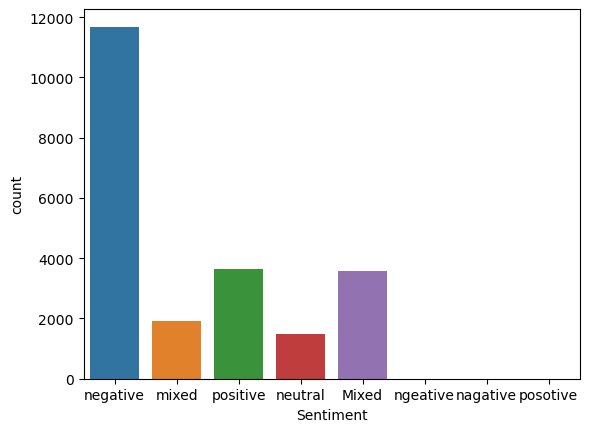

In [6]:
# Ratings & sentiments
sns.countplot(data=df, x='Rating')
sns.countplot(data=df, x='Sentiment')

<Axes: >

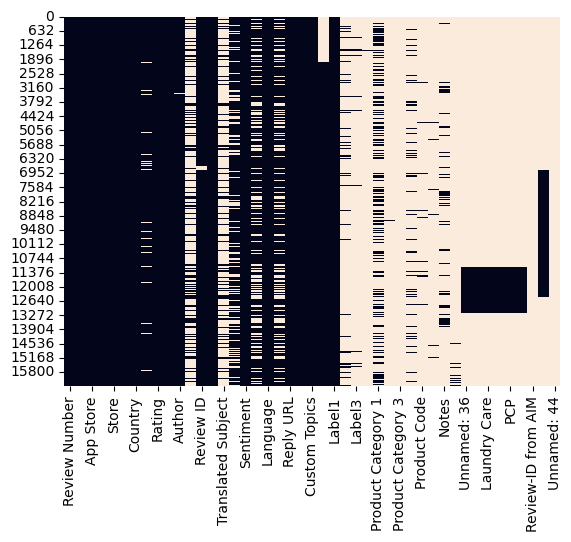

In [7]:
# Missing data visualization
sns.heatmap(df.isnull(), cbar=False)


In [8]:
for col in ['Product Category 1', 'Product Category 2', 'Product Category 3', 'Label1', 'Label2', 'Label3','Label4', 'Product']:
    print(df[col].value_counts())


Product Category 1
Dish Care            4097
Laundry Care         1158
Cooking               841
PCP                   432
Consumer Products     173
Cooling                82
Name: count, dtype: int64
Product Category 2
Laundry Care         101
Cooking               77
Dish Care             56
PCP                   29
Cooling               19
Consumer Products      4
Name: count, dtype: int64
Product Category 3
Cooling         10
PCP             10
Laundry Care     6
Cooking          6
Dish Care        3
Name: count, dtype: int64
Label1
Various                             3044
Sporadic connection losses          2314
Pairing                             1384
Usability                           1189
Login                                946
App functions                        915
App reliability                      739
App availability                     731
Remote Start/Control                 622
Push Notification                    597
Connection other                     520
Connec

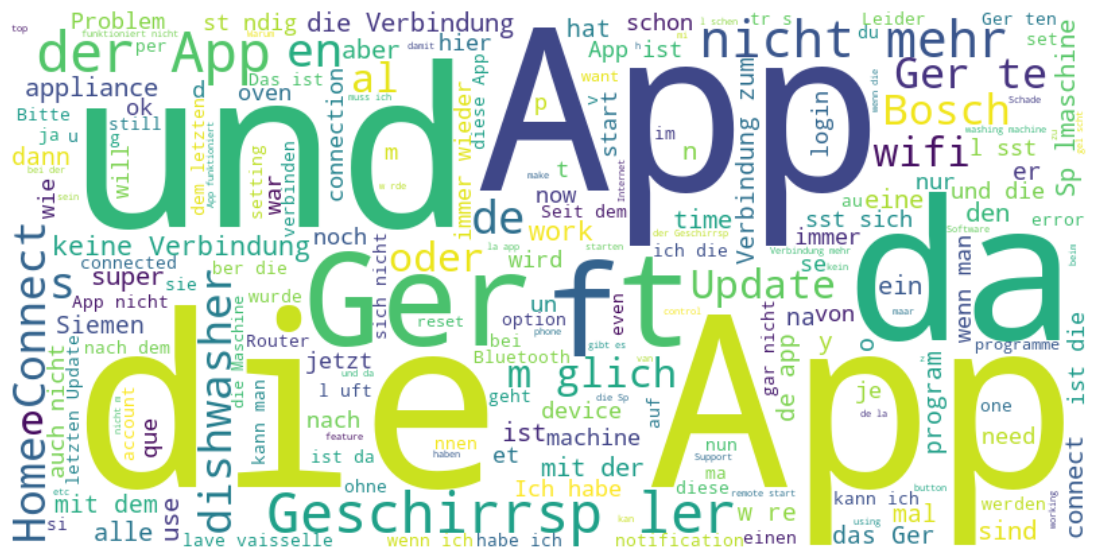

In [9]:
from wordcloud import WordCloud

text = ' '.join(df['Body'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [10]:
df.columns

Index(['Review Number', 'App Name', 'App Store', 'App', 'Store', 'App ID',
       'Country', 'Version', 'Rating', 'Date', 'Author', 'Subject',
       'Review ID', 'Body', 'Translated Subject', 'Translated Body',
       'Sentiment', 'Device', 'Language', 'OS Version', 'Reply URL', 'Topics',
       'Custom Topics', 'Tags', 'Label1', 'Label2', 'Label3', 'Label4',
       'Product Category 1', 'Product Category 2', 'Product Category 3',
       'Product', 'Product Code', 'Error Code', 'Notes', 'HC function',
       'Unnamed: 36', 'Dish Care', 'Laundry Care', 'Cooking', 'PCP', 'Cooling',
       'Review-ID from AIM', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [11]:
# Missing Value check
df.isna().sum()


Review Number             0
App Name                  0
App Store                 0
App                       0
Store                     0
App ID                    0
Country                   0
Version                 718
Rating                    0
Date                      0
Author                   46
Subject               12008
Review ID               192
Body                      0
Translated Subject    13071
Translated Body        3645
Sentiment                 0
Device                 5120
Language                 31
OS Version             4642
Reply URL                 0
Topics                    0
Custom Topics             0
Tags                   2020
Label1                    1
Label2                14432
Label3                16147
Label4                16395
Product Category 1     9646
Product Category 2    16143
Product Category 3    16394
Product               14700
Product Code          16181
Error Code            16109
Notes                 14344
HC function         

array([[<Axes: title={'center': 'Review Number'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Unnamed: 43'}>,
        <Axes: title={'center': 'Unnamed: 44'}>]], dtype=object)

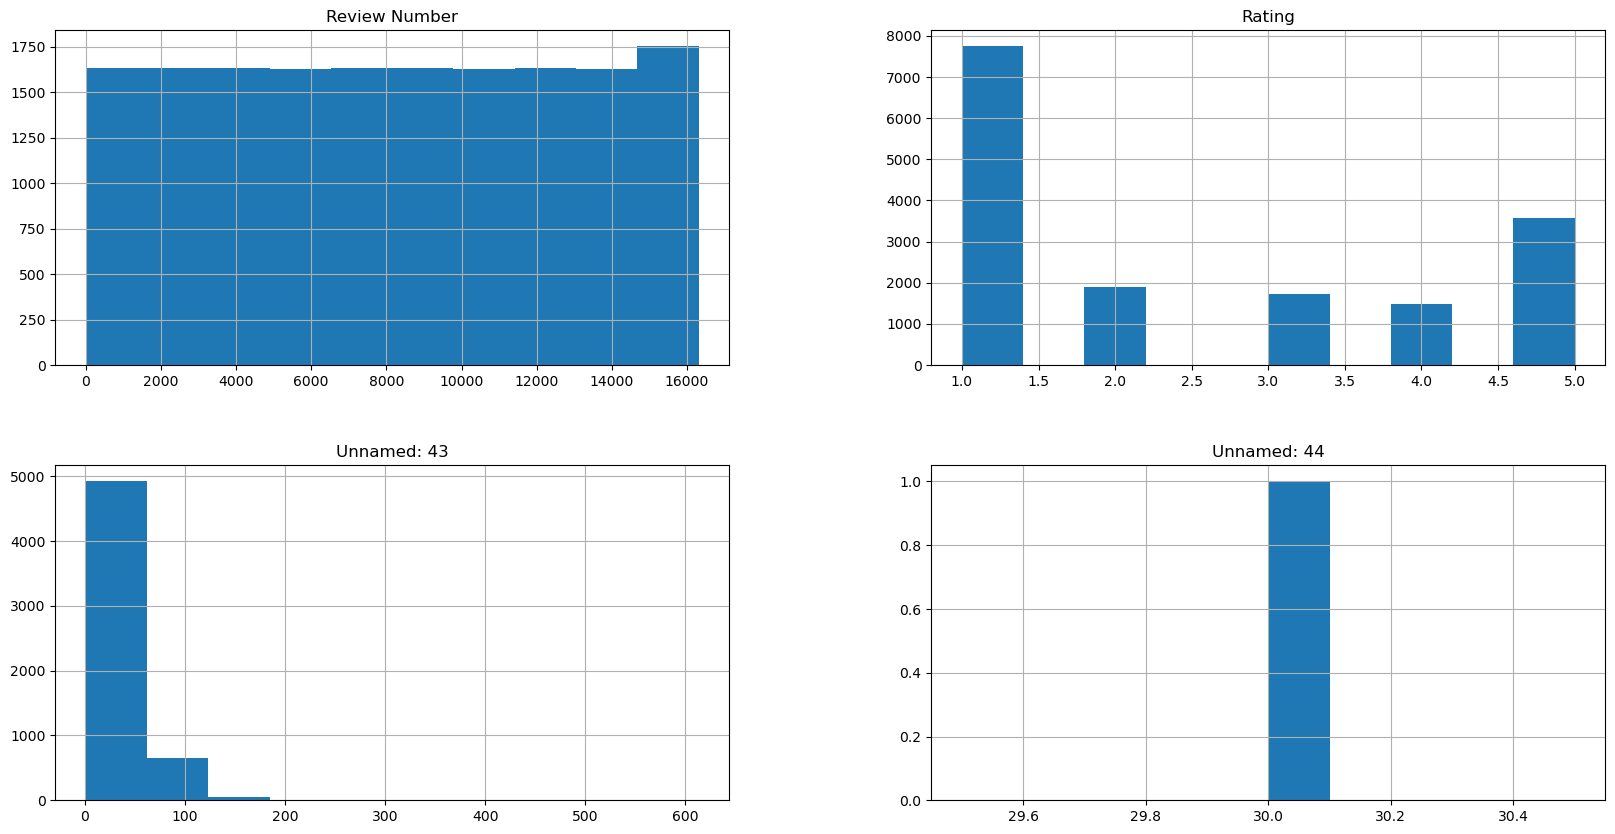

In [12]:
# exploring the outliers
df.hist(figsize = (20,10))


In [13]:
# Select relevant columns (this will drop any missing ones silently if needed)
relevant_columns = [
    'Rating', 'Date', 'Body', 'Translated Subject', 'Subject', 'Translated Body',
    'Sentiment', 'Custom Topics', 'Label1', 'Label2', 'Label3', 'Label4',
    'Product Category 1', 'Product Category 2', 'Product Category 3',
    'Product', 'Product Code', 'Error Code', 'HC function'
]

# Keep only columns that exist in the data (in case of unexpected column names)
df = df[[col for col in relevant_columns if col in df.columns]]

df.head()


,Rating,Date,Body,Translated Subject,Subject,Translated Body,Sentiment,Custom Topics,Label1,Label2,Label3,Label4,Product Category 1,Product Category 2,Product Category 3,Product,Product Code,Error Code,HC function
0,1,01.01.2021,AVOID LIKE THE PLAGUE. Should have been zero s...,NaN,NaN,NaN,negative,"[""Connection & errors""]",Sporadic connection losses,NaN,NaN,NaN,Laundry Care,NaN,NaN,NaN,NaN,NaN,NaN
1,2,01.01.2021,Bardzo s?abo si? ??czy z telefonem. U mnie WFI...,NaN,NaN,It connects very poorly with the phone. For me...,negative,[],Connection speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,01.01.2021,Difficult to add appliance. Restarting app aft...,NaN,NaN,NaN,negative,[],App reliability,Pairing,NaN,NaN,Laundry Care,NaN,NaN,Washer,NaN,NaN,NaN
3,1,01.01.2021,Lsst sich nicht mit home connect verbinden (F...,NaN,NaN,Cannot be connected to home connect (Fold 2 / ...,negative,"[""Connection & errors""]",Pairing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,01.01.2021,Please contact me at Skype/WhatsApp: +86189035...,NaN,Do you wanna raise downloads and revenue over ...,NaN,mixed,[],Spam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.columns


Index(['Rating', 'Date', 'Body', 'Translated Subject', 'Subject',
       'Translated Body', 'Sentiment', 'Custom Topics', 'Label1', 'Label2',
       'Label3', 'Label4', 'Product Category 1', 'Product Category 2',
       'Product Category 3', 'Product', 'Product Code', 'Error Code',
       'HC function'],
      dtype='object')

In [24]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"[^a-zA-ZäöüÄÖÜß\s]", '', text)       # Remove special chars
    text = re.sub(r"\s+", ' ', text).strip()
    return text

df['Cleaned_Body'] = df['Body'].astype(str).apply(clean_text)


In [15]:
# Standardize text columns
for col in ['Label1', 'Label2', 'Label3', 'Label4', 'Product', 'HC function', 'Product Category 1']:
    df[col] = df[col].astype(str).str.lower().str.strip()


In [16]:
# Handle missing values 
# Drop rows with essential missing data
df = df.dropna(subset=['Translated Body', 'Product Category 1']) 

In [17]:
# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")


In [18]:
def one_hot_merge(df, col_name):
    encoded = encoder.fit_transform(df[[col_name]])
    df = pd.concat([df, encoded], axis=1)
    return df.drop(columns=[col_name])

In [19]:
df = one_hot_merge(df, 'Product Category 1')
df = one_hot_merge(df, 'Label1')
df = one_hot_merge(df, 'Product')
df = one_hot_merge(df, 'HC function')


In [20]:
# Define features (X) and targets (y) 
# Use all columns except the target one-hot columns for X
target_cols = [col for col in df.columns if col.startswith("product category 1_")]
label_cols = [col for col in df.columns if col.startswith("label1_")]
product_cols = [col for col in df.columns if col.startswith("product_")]
hc_cols = [col for col in df.columns if col.startswith("hc function_")]

y = df[target_cols + label_cols + product_cols + hc_cols]
X = df.drop(columns=target_cols + label_cols + product_cols + hc_cols)

In [21]:
# Optional: check remaining columns in X 
display(X.head(3))
print("Predictor columns:", X.columns.tolist())
print("Target columns:", y.columns.tolist())

,Rating,Date,Body,Translated Subject,Subject,Translated Body,Sentiment,Custom Topics,Label2,Label3,...,HC function_notification center,HC function_program assistance,HC function_program assistant,HC function_program favorites,HC function_singlekeyid,HC function_smart start,HC function_smart watch,HC function_tab counter,HC function_user manuals,HC function_widget
1,2,01.01.2021,Bardzo s?abo si? ??czy z telefonem. U mnie WFI...,NaN,NaN,It connects very poorly with the phone. For me...,negative,[],nan,nan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,01.01.2021,Lsst sich nicht mit home connect verbinden (F...,NaN,NaN,Cannot be connected to home connect (Fold 2 / ...,negative,"[""Connection & errors""]",nan,nan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3,01.01.2021,Verbindung zum Gert funktioniert nicht immer....,NaN,NaN,Connection to the device does not always work....,negative,"[""Connection & errors""]",nan,nan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Predictor columns: ['Rating', 'Date', 'Body', 'Translated Subject', 'Subject', 'Translated Body', 'Sentiment', 'Custom Topics', 'Label2', 'Label3', 'Label4', 'Product Category 2', 'Product Category 3', 'Product Code', 'Error Code', 'Product Category 1_consumer products', 'Product Category 1_cooking', 'Product Category 1_cooling', 'Product Category 1_dish care', 'Product Category 1_laundry care', 'Product Category 1_nan', 'Product Category 1_pcp', 'Label1_3rd party', 'Label1_app availability', 'Label1_app compatibility', 'Label1_app crash', 'Label1_app functions', 'Label1_app installation', 'Label1_app performance', 'Label1_app reliability', 'Label1_app start', 'Label1_barrier free use', 'Label1_connection losses after update', 'Label1_connection other', 'Label1_connection speed', 'Label1_customer service', 'Label1_device functions', 'Label1_feature shutdown', 'Label1_firmware update', 'Label1_improvement ideas', 'Label1_language', 'Label1_login', 'Label1_nan', 'Label1_pairing', 'Label1

In [22]:
# Train/Valid/Test Split 
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)